In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
DATA_DIR = '/home/iiticos/Desktop/Personal Docs/QC/IMC-Prosperity_2024/Data/round1/'

list = ['prices_round_1_day_-1.csv','prices_round_1_day_-2.csv','prices_round_1_day_0.csv']

df1 = pd.read_csv(DATA_DIR + list[0], sep=';')
df2 = pd.read_csv(DATA_DIR + list[1], sep=';')
df3 = pd.read_csv(DATA_DIR + list[2], sep=';')

print(df1['bid_price_1'].min())
print(df2['bid_price_1'].min())
print(df3['ask_price_1'].min())

# df1['bid_price_1'].head(100).plot()

5017
4948
5028


In [87]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
3,-1,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,999700,STARFRUIT,5053,1,5048.0,26.0,NaN,NaN,5054,2,5055.0,24.0,NaN,NaN,5053.5,0.0
59996,0,999800,STARFRUIT,5047,27,NaN,NaN,NaN,NaN,5052,1,5054.0,27.0,NaN,NaN,5049.5,0.0
59997,0,999800,AMETHYSTS,9995,27,NaN,NaN,NaN,NaN,10005,27,NaN,NaN,NaN,NaN,10000.0,0.0
59998,0,999900,STARFRUIT,5048,2,5047.0,21.0,NaN,NaN,5054,23,NaN,NaN,NaN,NaN,5051.0,0.0


# Individual dataframe analysis

In [105]:
def plot_individual(df1):
    a = df1[df1['product']=="AMETHYSTS"]
    a = a[['timestamp','mid_price']]
    a = a.set_index('timestamp')
    b = df1[df1['product']=="STARFRUIT"]
    b = b[['timestamp','mid_price']]
    b = b.set_index('timestamp')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(a)
    ax1.set_title('AMETHYSTS')
    ax2.plot(b)
    ax2.set_title('STARFRUIT')
    plt.show()


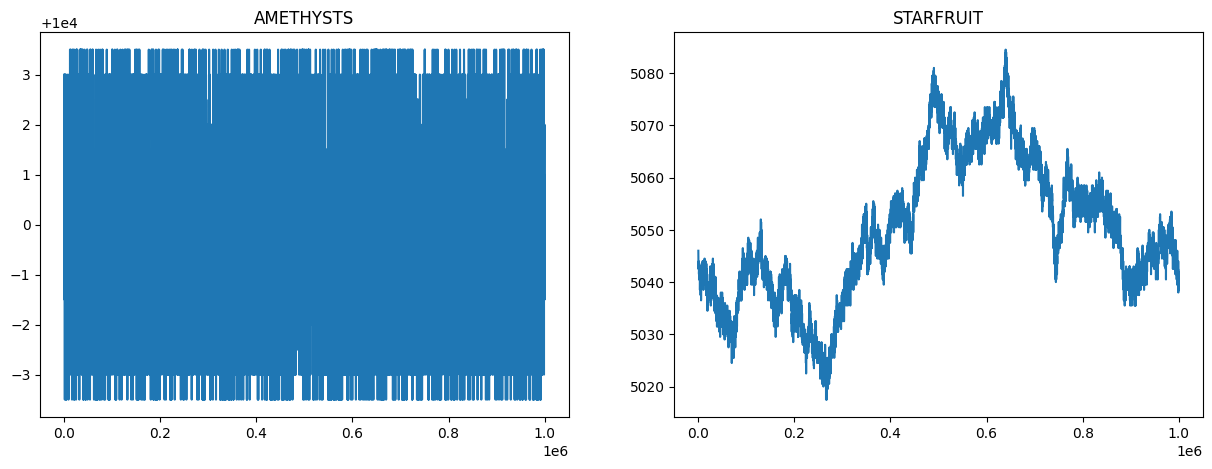

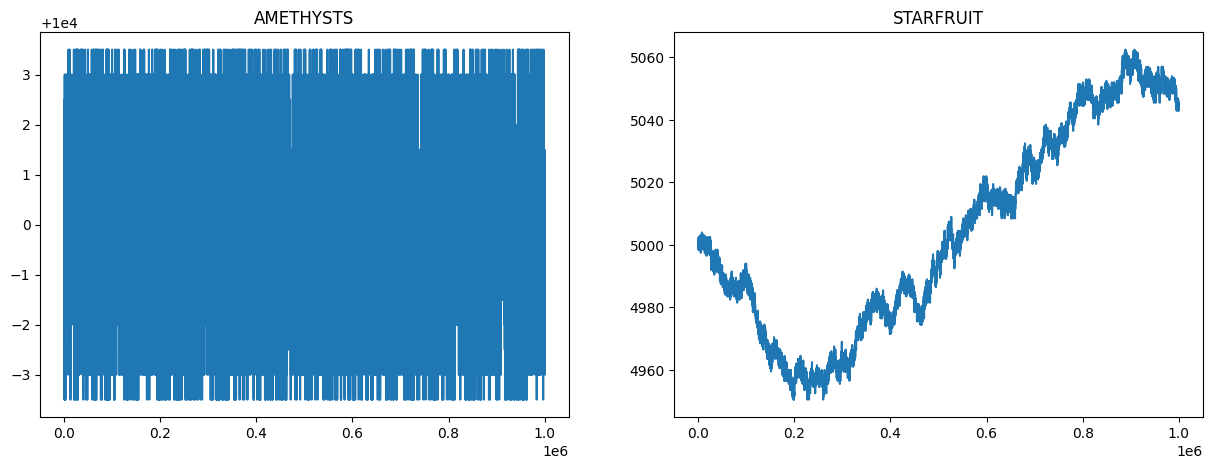

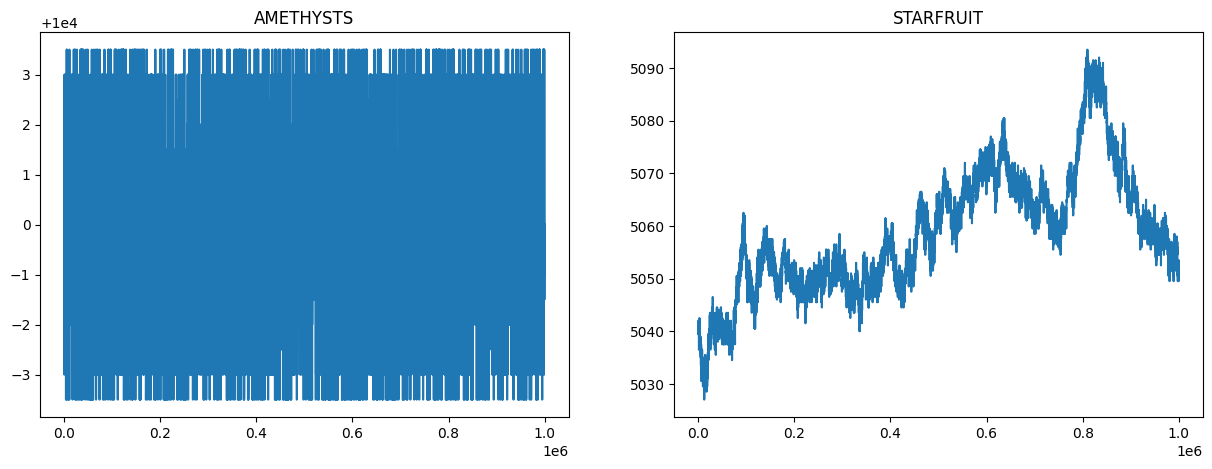

In [106]:
plot_individual(df1)
plot_individual(df2)
plot_individual(df3)

# Combined dataframe

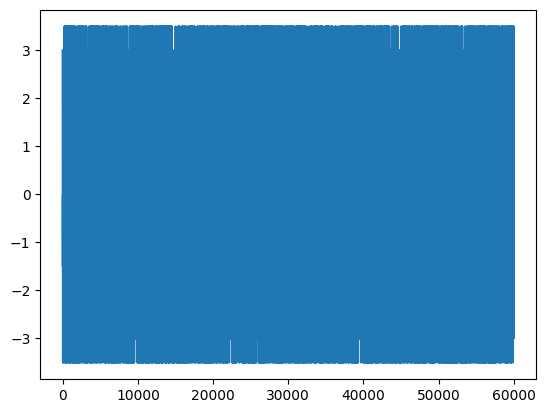

In [96]:
a = df[df['product']=="AMETHYSTS"]
a = a[['mid_price']]
a['residual'] = a['mid_price'] - 10000
b = df[df['product']=="STARFRUIT"]
b = b[['mid_price']]

plt.plot(a['residual'])
# plt.plot(b)
plt.show()

In [100]:
print("max",a['residual'].max())
print("min",a['residual'].min())

max 3.5
min -3.5
